# Python Code for Household Power Consumption Analysis

## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#!pip install pmdarima --quiet
import pmdarima as pm

### Importing the household power consumption data in the Jupyter notebook

In [3]:
df=pd.read_csv(r"C:\Users\mohan\OneDrive\Documents\MS\ISM_6316\DataSets\power_consumption\household_power_consumption.txt",sep=';')

C:\Users\mohan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### EDA (Exploratory Data Analysis)

In [5]:
print("The Size of the DataFrame",df.shape)
df.head()

The Size of the DataFrame (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
print("Checking the what type of variables are assoicaited in each column ")
df.dtypes

Check the what type of variables are assoicaited in each column 


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [12]:
#Converting the columns as per datatypes and adding new columns
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month_name()

In [11]:
#To see any unsupported values or any missing values are there
print("Counting the occurrences of unique values in Sub_metering_1,2,3, Global_active_power,")
print(df['Sub_metering_1'].value_counts())
print(df['Sub_metering_2'].value_counts())
print(df['Sub_metering_3'].value_counts())
print(df['Global_active_power'].value_counts())

Counting the occurrences of unique values in Sub_metering_1,2,3, Global_active_power,
0.000    1840611
1.000      82920
0.0        39564
?          25979
2.000      18537
          ...   
72.0           1
81.0           1
76.0           1
63.0           1
57.0           1
Name: Sub_metering_1, Length: 153, dtype: int64
0.000    1408274
1.000     367317
2.000     153938
0.0        28556
?          25979
          ...   
61.0           1
60.0           1
56.0           1
51.0           1
15.0           1
Name: Sub_metering_2, Length: 145, dtype: int64
0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0     

In [13]:
#checking whether all columns are in exact format or not
print("The Size of the DataFrame",df.shape)
df.dtypes

The Size of the DataFrame (2075259, 12)


Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
Year                              int64
Month                            object
dtype: object

In [15]:
#Descriptive Stats
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2.008437e+03
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,1.128677e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.006000e+03
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.008000e+03
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2.009000e+03
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2.010000e+03


In [16]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,December
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,December
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,December
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,December
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,December


In [19]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
df.dropna().reset_index(inplace=True)
df.head()

Missing Values:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Year                     0
Month                    0
dtype: int64


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,December
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,December
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,December
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,December
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,December


## Visualizations

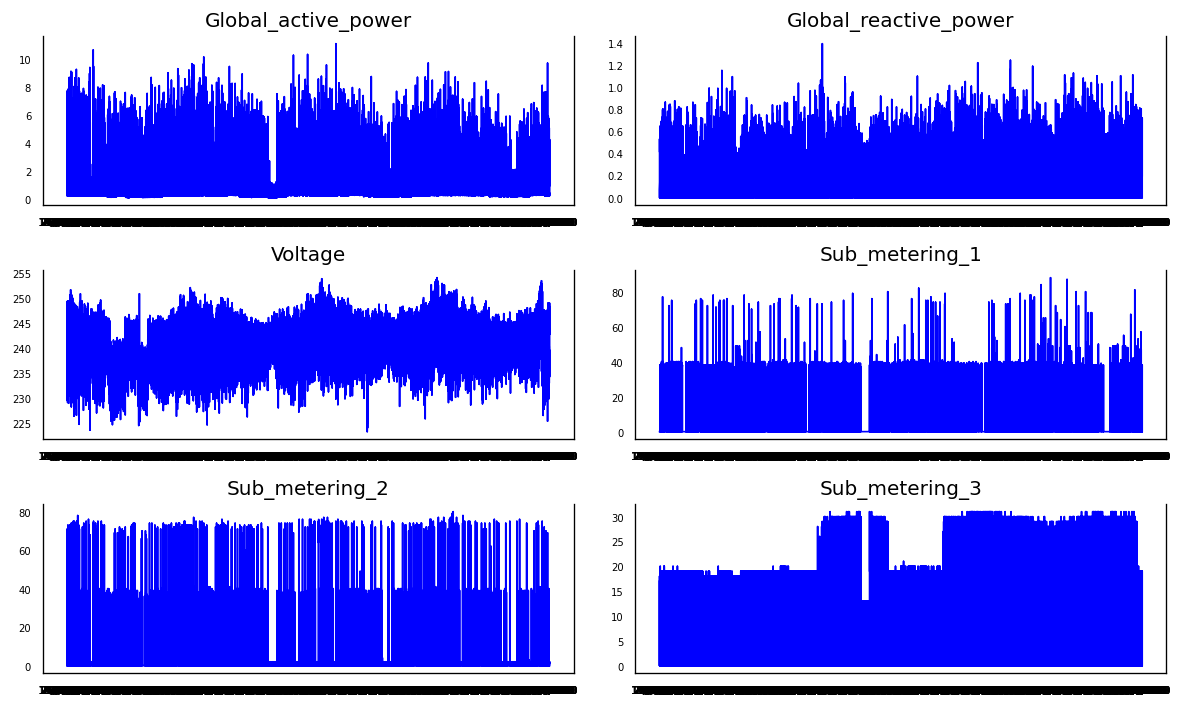

In [47]:
df_new=df[['Date','Global_active_power','Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']].dropna()
df_new.set_index('Date',inplace=True)
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_new[df_new.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    ax.set_title(df_new.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

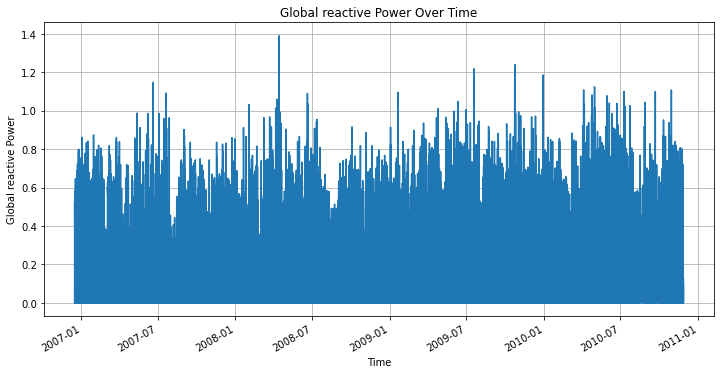

In [48]:
# Data distribution and histograms for Global active power
df_time=df.copy()
df_time.set_index('Datetime', inplace=True)
plt.figure(figsize=(12, 6))
df_time['Global_reactive_power'].dropna().plot(title='Global reactive Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global reactive Power')
plt.grid(True)
plt.show()

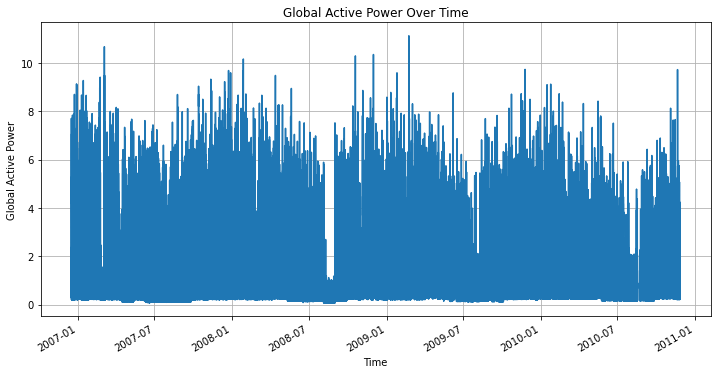

In [49]:
# Data distribution and histograms for Global active power
plt.figure(figsize=(12, 6))
df_time['Global_active_power'].dropna().plot(title='Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.grid(True)
plt.show()

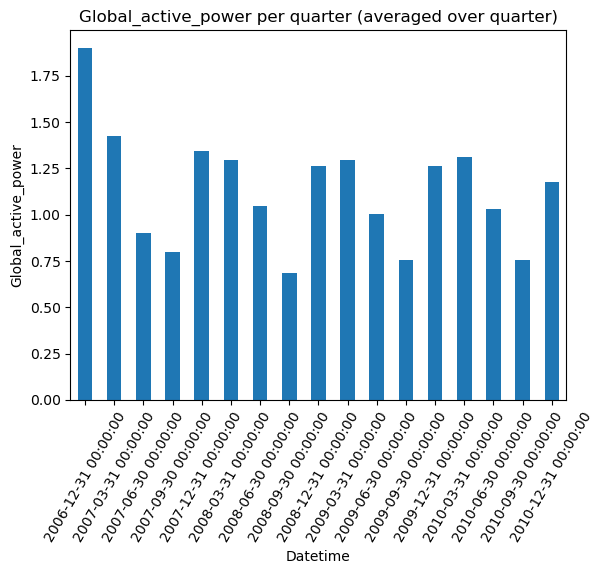

In [15]:
## Mean of 'Global_active_power' resampled over quarter
df_time['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

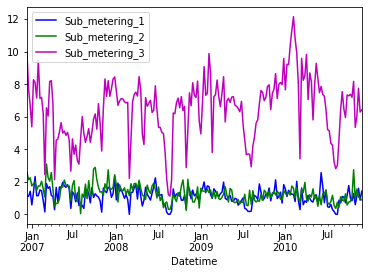

In [26]:
#Visualizing to see which submetering has the highest power consumption
df_time.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df_time.Sub_metering_2.resample('W').mean().plot(color='g', legend=True)
df_time.Sub_metering_3.resample('W').mean().plot(color='m', legend=True)
plt.show()


In [50]:
# Group the data by 'Sub_metering_1', 'Sub_metering_2', and 'Sub_metering_3' categories and sum the 'Global_active_power'
sub_metering_1_contributors = df.groupby('Sub_metering_1')['Global_active_power'].sum()
sub_metering_2_contributors = df.groupby('Sub_metering_2')['Global_active_power'].sum()
sub_metering_3_contributors = df.groupby('Sub_metering_3')['Global_active_power'].sum()

# Find the appliance or load type with the highest contribution
appliance_sub_metering_1 = sub_metering_1_contributors.idxmax()
appliance_sub_metering_2 = sub_metering_2_contributors.idxmax()
appliance_sub_metering_3 = sub_metering_3_contributors.idxmax()

print(f"Appliance contributing the most to Sub_metering_1: {appliance_sub_metering_1}")
print(f"Appliance contributing the most to Sub_metering_2: {appliance_sub_metering_2}")
print(f"Appliance contributing the most to Sub_metering_3: {appliance_sub_metering_3}")


Appliance contributing the most to Sub_metering_1: 0.0
Appliance contributing the most to Sub_metering_2: 0.0
Appliance contributing the most to Sub_metering_3: 18.0


In [27]:
# Group the data by year and month and count the consumption for Active Power in each group
monthly_consumption = df_time.groupby(['Year', 'Month'])['Global_active_power'].sum().unstack()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_consumption = monthly_consumption[month_order]
monthly_consumption=monthly_consumption.transpose()
monthly_consumption

Year,2006,2007,2008,2009,2010
Month,,,,,
January,NaN,69011.862,65169.382,62950.008,59379.658
February,NaN,56488.886,49331.072,50222.090,55471.706
March,NaN,58862.192,55590.594,54758.986,48155.898
April,NaN,35181.466,48209.992,49275.524,44378.124
May,NaN,44008.872,45721.860,45209.830,48892.400
June,NaN,35682.828,42943.972,33541.980,41885.424
July,NaN,29703.830,35477.418,27590.444,32187.752
August,NaN,34096.460,12341.880,29076.404,22103.374
September,NaN,41872.606,42667.792,42628.564,36309.424


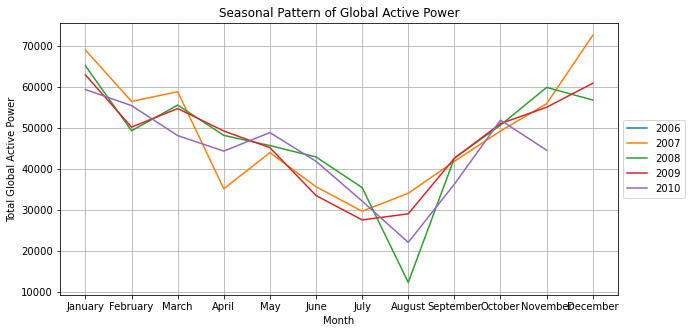

In [31]:
plt.figure(figsize=(10,5))
for year in monthly_consumption.columns:
    plt.plot(monthly_consumption.index, monthly_consumption[year], label=year)
plt.title("Seasonal Pattern of Global Active Power")
plt.xlabel("Month")
plt.ylabel("Total Global Active Power")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()

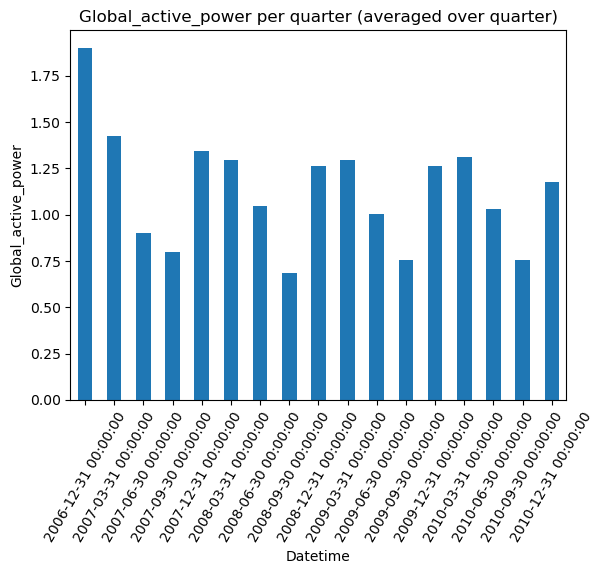

In [19]:
df_time['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

### Correlation and Heatmap

In [22]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.034328
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.047018
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,0.254623
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.038621
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.012557
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.035939
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.062396
Year,-0.034328,0.047018,0.254623,-0.038621,-0.012557,-0.035939,0.062396,1.000000


In [35]:
df['Real_Power']=np.sqrt(df['Global_active_power']**2-df['Global_reactive_power']**2)
df.head()

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Real_Power
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,December,4.195227
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,December,5.342238
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,December,5.350876
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,December,5.364563
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,December,3.627778


C:\Users\keval\AppData\Local\Temp\ipykernel_5980\723874698.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(),dtype=bool)
C:\Users\keval\AppData\Local\Temp\ipykernel_5980\723874698.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),mask=mask,annot=True,cmap='YlGnBu')


<Axes: >

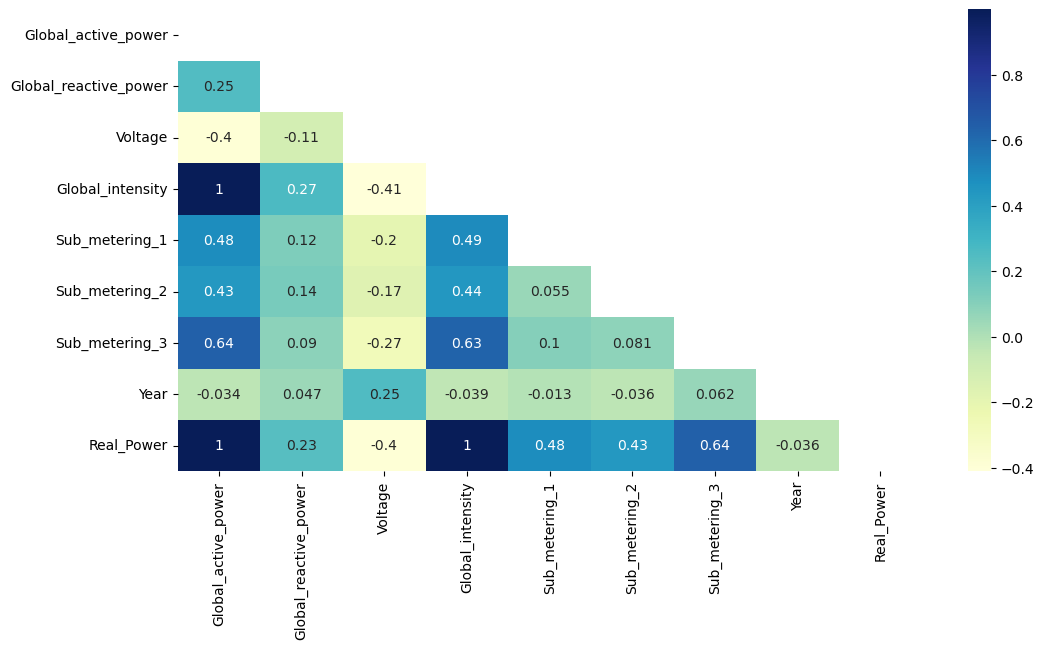

In [35]:
plt.figure(figsize=(12,6))
mask = np.zeros_like(df.corr(),dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(),mask=mask,annot=True,cmap='YlGnBu')

In [36]:
df_t=df[['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3','Real_Power']].dropna()
df_t.shape

(2043450, 6)

## Models

In [37]:
#Split Data into test and training data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_t[['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']],df_t['Real_Power'],test_size=0.3,random_state=42)

In [38]:
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso  # Add Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
import pandas as pd
import numpy as np

# Making a dictionary of models
models = {
    #'SVR':SVR()
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'SGDRegressor': SGDRegressor(),
    'BayesianRidge': BayesianRidge(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'Lasso': Lasso() 
}

# Lists to store model results
model_results = []
model_results_2 = []
model_results_r2 = [] 
model_names = []

# Training the models
for name, model in models.items():
    a = model.fit(x_train, y_train)
    predicted = a.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    
    Coefficient_of_Determination = np.corrcoef(y_test, predicted)
    corr = Coefficient_of_Determination[0, 1]
    R_sq = corr**2
    
    r2 = r2_score(y_test, predicted)  # Calculate R-squared
    
    model_results.append(score)
    model_results_2.append(R_sq)
    model_results_r2.append(r2)  # Append R-squared
    model_names.append(name)

# Creating a DataFrame
df_results = pd.DataFrame({
    'Model': model_names,
    'RMSE': model_results,
    'Coefficient_of_Determination': model_results_2,
    'R-squared': model_results_r2  # Add R-squared
}).sort_values(by='RMSE', ascending=False)

print(df_results)


C:\Users\mohan\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1225: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


                   Model          RMSE  Coefficient_of_Determination  \
2           SGDRegressor  1.736642e+12                      0.095070   
6                  Lasso  6.172248e-01                      0.706879   
1             ElasticNet  5.799552e-01                      0.716905   
5  RandomForestRegressor  5.574724e-01                      0.729852   
3          BayesianRidge  5.469204e-01                      0.736874   
0                  Ridge  5.469204e-01                      0.736874   
4       LinearRegression  5.469204e-01                      0.736874   

      R-squared  
2 -2.653003e+24  
6  6.648775e-01  
1  7.041267e-01  
5  7.266220e-01  
3  7.368732e-01  
0  7.368732e-01  
4  7.368732e-01  


<br><b>SGDRegressor:</b>
<br>RMSE: 1.736642e+12
<br>Coefficient of Determination: 0.095070
<br>R-squared: -2.653003e+24
<br>Analysis: The extremely high RMSE and very low Coefficient of Determination and R-squared values suggest that the SGDRegressor is not fitting the data well at all. The negative R-squared indicates a very poor fit.

<br><b>Lasso:</b>
<br>RMSE: 0.617225
<br>Coefficient of Determination: 0.706879
<br>R-squared: 0.6648775
<br>Analysis: Lasso has a relatively low RMSE and moderate Coefficient of Determination and R-squared values, indicating a reasonable fit to the data.

<br><b>ElasticNet:</b>
<br>RMSE: 0.5799552
<br>Coefficient of Determination: 0.716905
<br>R-squared: 0.7041267
<br>Analysis: ElasticNet has a lower RMSE and moderate Coefficient of Determination and R-squared values, showing a reasonable fit to the data.

<br><b>RandomForestRegressor:</b>
<br>RMSE: 0.5574724
<br>Coefficient of Determination: 0.729852
<br>R-squared: 0.7266220
<br>Analysis: RandomForestRegressor has the lowest RMSE among the models and moderate Coefficient of Determination and R-squared values, indicating a relatively good fit to the data.

<br><b>BayesianRidge, Ridge, LinearRegression (all have the same values):</b>
<br>RMSE: 0.5469204
<br>Coefficient of Determination: 0.736874
<br>R-squared: 0.7368732
<br>Analysis: These three models have the same RMSE and relatively high Coefficient of Determination and R-squared values, indicating a strong fit to the data. <b>These models are among the top performers in terms of RMSE and R-squared.</b>


### Optmizing the Model Performance with XGBoost and Feature Importance

In [42]:
import math
import xgboost as xgb
from xgboost import XGBRegressor
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_t[['Global_reactive_power','Voltage','Sub_metering_1','Sub_metering_2','Sub_metering_3']],df_t['Real_Power'],test_size=0.3,random_state=42)
# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'colsample_bytree': 0.3,         # Subsample ratio of columns when constructing each tree
    'learning_rate': 0.1,            # Step size shrinkage to prevent overfitting
    'max_depth': 5,                  # Maximum depth of the tree
    'alpha': 10,                     # L1 regularization term on weights
}
# Create DMatrix objects for efficient training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
# Specify the number of boosting rounds and early stopping
num_boost_round = 1000
early_stopping_rounds = 40
model = XGBRegressor(params=params, n_estimators=num_boost_round)
# Train the model
model.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=early_stopping_rounds, verbose=True)
# Predict on the test data
y_pred = model.predict(X_test)
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse=math.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

[0]	validation_0-rmse:0.83970
[1]	validation_0-rmse:0.70058
[2]	validation_0-rmse:0.61927


C:\Users\mohan\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\mohan\anaconda3\lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\mohan\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [17:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-rmse:0.57394
[4]	validation_0-rmse:0.54927
[5]	validation_0-rmse:0.53603
[6]	validation_0-rmse:0.52837
[7]	validation_0-rmse:0.52446
[8]	validation_0-rmse:0.52156
[9]	validation_0-rmse:0.52022
[10]	validation_0-rmse:0.51920
[11]	validation_0-rmse:0.51815
[12]	validation_0-rmse:0.51752
[13]	validation_0-rmse:0.51720
[14]	validation_0-rmse:0.51676
[15]	validation_0-rmse:0.51658
[16]	validation_0-rmse:0.51636
[17]	validation_0-rmse:0.51618
[18]	validation_0-rmse:0.51603
[19]	validation_0-rmse:0.51595
[20]	validation_0-rmse:0.51582
[21]	validation_0-rmse:0.51564
[22]	validation_0-rmse:0.51555
[23]	validation_0-rmse:0.51552
[24]	validation_0-rmse:0.51541
[25]	validation_0-rmse:0.51523
[26]	validation_0-rmse:0.51519
[27]	validation_0-rmse:0.51514
[28]	validation_0-rmse:0.51495
[29]	validation_0-rmse:0.51484
[30]	validation_0-rmse:0.51478
[31]	validation_0-rmse:0.51464
[32]	validation_0-rmse:0.51462
[33]	validation_0-rmse:0.51458
[34]	validation_0-rmse:0.51455
[35]	validation

[263]	validation_0-rmse:0.51194
[264]	validation_0-rmse:0.51195
[265]	validation_0-rmse:0.51194
[266]	validation_0-rmse:0.51193
[267]	validation_0-rmse:0.51193
[268]	validation_0-rmse:0.51192
[269]	validation_0-rmse:0.51192
[270]	validation_0-rmse:0.51192
[271]	validation_0-rmse:0.51192
[272]	validation_0-rmse:0.51192
[273]	validation_0-rmse:0.51193
[274]	validation_0-rmse:0.51193
[275]	validation_0-rmse:0.51193
[276]	validation_0-rmse:0.51192
[277]	validation_0-rmse:0.51192
[278]	validation_0-rmse:0.51192
[279]	validation_0-rmse:0.51192
[280]	validation_0-rmse:0.51192
[281]	validation_0-rmse:0.51191
[282]	validation_0-rmse:0.51191
[283]	validation_0-rmse:0.51192
[284]	validation_0-rmse:0.51192
[285]	validation_0-rmse:0.51189
[286]	validation_0-rmse:0.51189
[287]	validation_0-rmse:0.51188
[288]	validation_0-rmse:0.51188
[289]	validation_0-rmse:0.51188
[290]	validation_0-rmse:0.51188
[291]	validation_0-rmse:0.51189
[292]	validation_0-rmse:0.51188
[293]	validation_0-rmse:0.51187
[294]	va

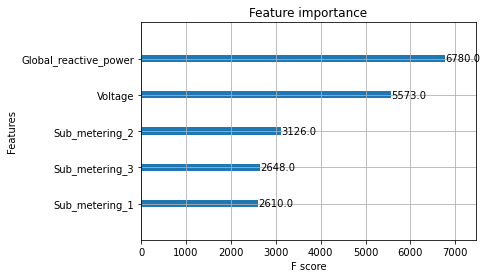

In [43]:
xgb.plot_importance(model)
plt.show()

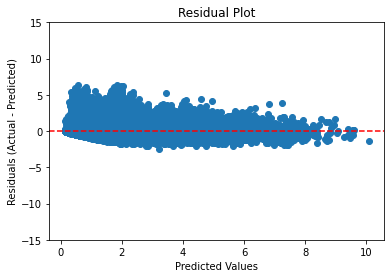

In [44]:
#Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.axhline(y=0, color='r', linestyle='--')
plt.yticks(range(-15, 16, 5))
plt.title("Residual Plot")
plt.show()


## Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost model and hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0] 
}

model = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model
mse = mean_squared_error(y_test, best_model.predict(x_test))
r2 = r2_score(y_test, best_model.predict(x_test))

In [67]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.9}

In [68]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.26286097316525864
R2 Score: 0.7687706404417891


## Time Series Modelling

In [51]:
df_time['power_consumption'] =  (df_time['Real_Power']*1000/60)  - (df_time['Sub_metering_1'] + df_time['Sub_metering_2'] + df_time['Sub_metering_3'])
df_subset = df_time[df_time.index.year>2006]
df_subset['Date']=pd.to_datetime(df_subset['Date'], format='%d/%m/%Y')
pivot_table_1 = pd.pivot_table(df_subset, index=['Date'],values=['Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3',
    'power_consumption'],aggfunc='sum')
pivot_table_1.head(10)

C:\Users\mohan\AppData\Local\Temp/ipykernel_25252/1643135550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Date']=pd.to_datetime(df_subset['Date'], format='%d/%m/%Y')


,Global_active_power,Global_intensity,Global_reactive_power,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage,power_consumption
Date,,,,,,,,
2007-01-01,2749.004,11400.4,148.166,0.0,352.0,5880.0,345785.73,39352.418586
2007-01-02,1269.236,5348.2,190.342,0.0,348.0,6562.0,348399.04,13772.952031
2007-01-03,1014.054,4340.2,196.728,0.0,344.0,4765.0,350722.21,11012.925622
2007-01-04,3259.412,13648.6,202.302,1051.0,7597.0,10896.0,345240.43,34532.252309
2007-01-05,2713.364,11354.6,173.154,1483.0,379.0,7602.0,346313.90,35469.931491
2007-01-06,1508.378,6543.2,192.188,1336.0,402.0,5678.0,345129.20,17208.408796
2007-01-07,2447.620,10487.0,246.074,1987.0,8177.0,12810.0,346899.58,17136.971076
2007-01-08,2241.360,9434.4,207.568,0.0,467.0,17547.0,344990.81,18987.650572
2007-01-09,1869.054,7950.4,207.248,1688.0,4267.0,9790.0,346302.03,14862.276038


In [62]:
#adding exogenous variable
pivot_table_1['month_index'] = pivot_table_1.index.month
# SARIMAX Model
SARIMAX_model = pm.auto_arima(pivot_table_1[['power_consumption']], exogenous=pivot_table_1[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=6,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

### Forecasting for 6 months

In [64]:
def sarimax_forecast(SARIMAX_model, periods=6):
    # Extract the datetime component from the DateTime index
    index_dates = pivot_table_1.index.date
    train = pivot_table_1[(index_dates >= pd.Timestamp('2007-01-01')) & (index_dates <=pd.Timestamp('2009-12-31'))]
    test = pivot_table_1[(index_dates > pd.Timestamp('2010-01-01'))]
    # Calculate the last date in the test set
    last_test_date = test.index[-1]
    # Generate the forecast index with monthly frequency starting from the last test date
    forecast_index = pd.date_range(last_test_date, periods=periods, freq='MS')
    forecast_df = pd.DataFrame({"month_index": forecast_index.month}, index=forecast_index)
    # Make predictions
    fitted, confint = SARIMAX_model.predict(test.shape[0], return_conf_int=True, exogenous=forecast_df[['month_index']]) # training prediction values
    fc_index = pd.to_datetime(test.index.get_level_values(0))
    index_of_fc = fc_index
    
    # Make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    # Plot
    plt.figure(figsize=(15, 7))
    plt.plot(pivot_table_1["power_consumption"], color='#1f76b4', label='Train/Test')
    # Highlight the predicted values
    plt.fill_between(index_of_fc, lower_series, upper_series, color='gray', alpha=0.5, label='Prediction Interval')
    plt.title("SARIMAX - Forecast of Power Consumption")
    plt.xlabel('Year-Month')
    plt.ylabel('Power Consumption')
    plt.legend(loc="best")
    plt.show()
    return test['power_consumption'], fitted_series


C:\Users\mohan\AppData\Local\Temp/ipykernel_25252/256169824.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train = pivot_table_1[(index_dates >= pd.Timestamp('2007-01-01')) & (index_dates <=pd.Timestamp('2009-12-31'))]
C:\Users\mohan\AppData\Local\Temp/ipykernel_25252/256169824.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test = pivot_table_1[(index_dates > pd.Timestamp('2010-01-01'))]
C:\Users\mohan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

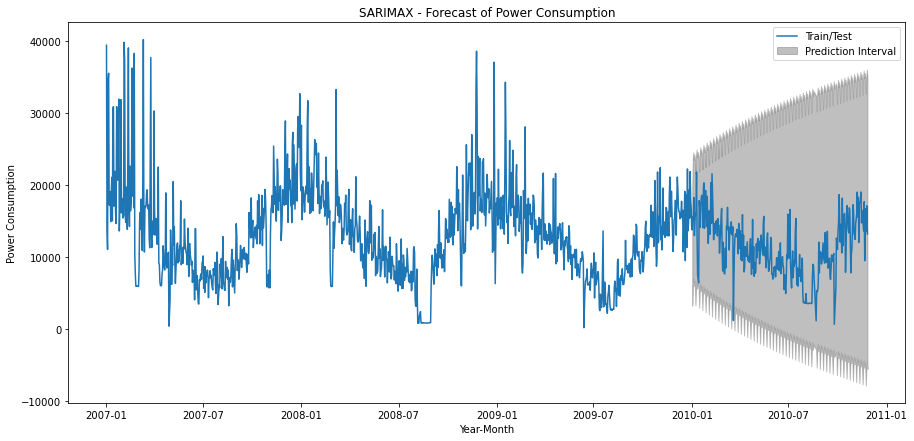

In [65]:
sarimax_actual_values, sarimax_test_prediction = sarimax_forecast(SARIMAX_model)

# Conclusion

### In this comprehensive analysis, we examined the performance of various regression models when applied to the dataset, revealing notable differences in their effectiveness. The SGDRegressor exhibited poor performance, characterized by an exceedingly high RMSE and very low Coefficient of Determination and R-squared values, indicating a lack of fit to the data. In contrast, Lasso and ElasticNet provided more reasonable fits with lower RMSE and moderate Coefficient of Determination and R-squared values. 
### RandomForestRegressor performed even better, boasting the lowest RMSE among the models and moderate Coefficient of Determination and R-squared values. Bayesian Ridge, Ridge, and LinearRegression models delivered consistently strong results, with high Coefficients of determination and R-squared values. Subsequent optimization with XGBoost and hyperparameter tuning led to improved performance metrics. Furthermore, a foray into time series modelling using the SARIMAX function allowed us to forecast the next six months. This comprehensive analysis underscores our commitment to exploring diverse modelling techniques and enhancing performance.

# Future Scope


### Exploring more advanced time series modelling techniques, such as Prophet, ARIMA, and deep learning-based approaches, will allow more precise and dynamic forecasting. To enrich the analysis, integrating additional data sources and external variables should be considered. Pursuing model interpretability will enable a deeper understanding of the driving factors behind predictions, enhancing their real-world utility. Online learning methods will support continuous model updates as new data emerges, ensuring adaptability. Lastly, developing automated pipelines for model retraining and deployment will streamline the transition from analysis to practical applications. These future avenues promise to advance research in this field, offering the potential for higher predictive accuracy, model reliability, and real-world relevance.